In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle 
import torch

In [2]:
def max_projection_fft(x):
    x_image = np.fft.fft2(x)
    #calculate the max for each pixel over the channels
    max_image = x_image[0,:,:].copy()
    #x_image = np.abs(x_image) #only look at the magnitude
    n = len(max_image)
    for i in range(n):
        for j in range(n):
            max_image[i,j] = max(np.abs(x_image[:,i,j]))
    return max_image

In [7]:
def plot_spectrum(fft_im, vmin, scale_factor):
    fshift0 = np.fft.fftshift(fft_im) #shifts the zero-frequency component to the center of the spectrum
    magnitude_spectrum = (np.log10(np.abs(fshift0*(np.power(10,scale_factor+1)-1)/np.power(10,scale_factor)+1/np.power(10,scale_factor)))+scale_factor)*1/(scale_factor+1)
    #plt.imshow(np.transpose(np.abs(magnitude_spectrum), (1, 2, 0)), vmin=vmin)
    plt.imshow(np.abs(magnitude_spectrum),  vmin=vmin)

In [8]:
orig = "/home/lorenzp/adversialml/src/pytorch-CelebAHQ/auto-attack/adv_complete/std/0.031373_std_6000_Linf_sorted_orig"
pert = "/home/lorenzp/adversialml/src/pytorch-CelebAHQ/auto-attack/adv_complete/std/0.031373_std_6000_Linf_sorted_pert"

In [9]:
adv_p = "/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/characteristics/std/cif10_std_LayerMFS_gray_eps_0.031373_adv.p"
orig_p = "/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/characteristics/std/cif10_std_LayerMFS_gray_eps_0.031373.p"

In [10]:
orig_col = pickle.load( open( orig_p, "rb" ) )[0]
pickle_col = pickle.load( open( adv_p, "rb" ) )[0]

FileNotFoundError: [Errno 2] No such file or directory: '/home/lorenzp/adversialml/src/pytorch-CelebAHQ/data/characteristics/std/cif10_std_LayerMFS_gray_eps_0.031373.p'

In [ ]:
# orig_img   = torch.load( orig )[0].cpu().numpy().transpose([1,2,0])
# pick_img   = torch.load( pert )[0].cpu().numpy().transpose([1,2,0])
orig_img   = torch.load( orig )[0].cpu().numpy()
pick_img   = torch.load( pert )[0].cpu().numpy()

In [ ]:
orig_img.shape

In [ ]:
type(orig_img)

In [ ]:
plt.imshow(orig_img)

In [ ]:
plt.imshow(pick_img)

In [ ]:
plt.figure()
plt.imshow(np.abs(orig_img - pick_img))
plt.colorbar()

In [13]:
img = max_projection_fft(orig_img)
att = max_projection_fft(pick_img)

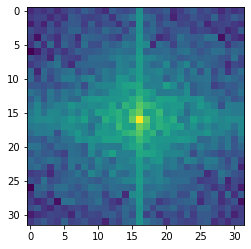

In [14]:
fft = max_projection_fft(orig_img)
ad_fft = max_projection_fft(pick_img)
ad_fft *= 1/np.max(ad_fft)
fft *= 1/np.max(fft)
scale_factor=5
m_n = (np.log10(np.abs(np.fft.fftshift(np.abs(fft))*(np.power(10,scale_factor+1)-1)/np.power(10,scale_factor)+1/np.power(10,scale_factor)))+scale_factor)*1/(scale_factor+1)
m_a = (np.log10(np.abs(np.fft.fftshift(np.abs(ad_fft))*(np.power(10,scale_factor+1)-1)/np.power(10,scale_factor)+1/np.power(10,scale_factor)))+scale_factor)*1/(scale_factor+1)
vmin = min(np.min(m_n),np.min(m_a))

plot_spectrum(fft, vmin=vmin, scale_factor=5)
# plt.axis('off')
# #plt.colorbar()
# #adversarial image
# plt.subplot(3,2,3)
# plt.title('Adversarial image', fontsize=24)
# plot_im(ad)
# plt.axis('off')
# plt.subplot(3,2,4)
# plt.title('Adversarial Fourier spectrum', fontsize=24)

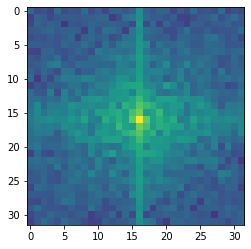

In [15]:
plot_spectrum(ad_fft, vmin=vmin, scale_factor=5)

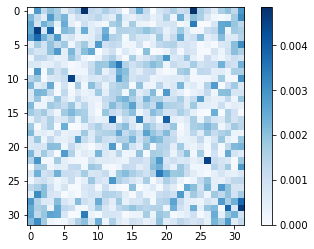

In [17]:
plt.imshow(np.abs(ad_fft-fft), cmap='Blues'); plt.colorbar()